<a href="https://colab.research.google.com/github/dfiorellino/Ana-Pred/blob/main/final_FINAL_ANA_PRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from math import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
base =pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Ana_Pred_final.csv',sep=',')

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            19158 non-null  int64  
 1   city                                  19158 non-null  int64  
 2   city_development_index                19158 non-null  float64
 3   relevent_experience                   19158 non-null  int64  
 4   education_level                       19158 non-null  int64  
 5   experience                            19158 non-null  int64  
 6   last_new_job                          19158 non-null  int64  
 7   training_hours                        19158 non-null  int64  
 8   company_size_high_company_size        19158 non-null  int64  
 9   company_size_low_company_size         19158 non-null  int64  
 10  gender_Female                         19158 non-null  int64  
 11  gender_Male    

In [23]:
base.head()

,Unnamed: 0,city,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,company_size_high_company_size,company_size_low_company_size,gender_Female,gender_Male,gender_Other,enrolled_university_Full time course,enrolled_university_no_enrollment,high_major_discipline,company_type_high_company_type,company_type_low_company_type,target
0,1,0,0.920,1,3,21,1,36,1,0,0,1,0,0,1,1,1,0,1
1,2,1,0.776,0,3,15,5,47,0,1,0,1,0,0,1,1,0,1,0
2,3,2,0.624,0,3,5,0,83,1,0,0,0,0,1,0,1,1,0,0
3,4,3,0.789,0,3,0,0,52,1,0,0,0,0,0,1,1,0,1,1
4,5,4,0.767,1,4,21,4,8,0,1,0,1,0,0,1,1,0,1,0


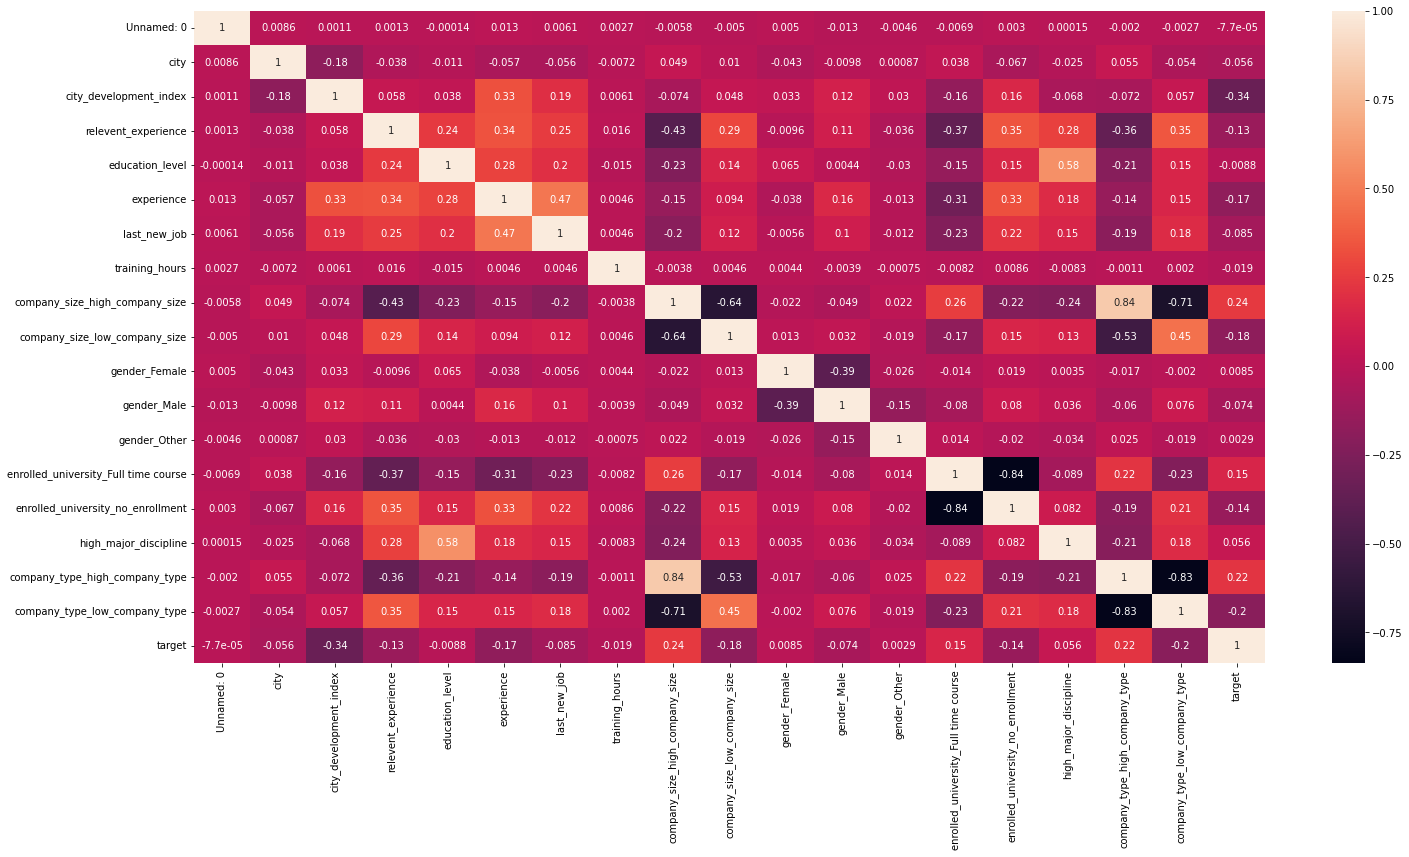

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(24,12))
sns.heatmap(base.corr(), annot = True)

Text(0.5, 1.0, 'Correlation matrix')

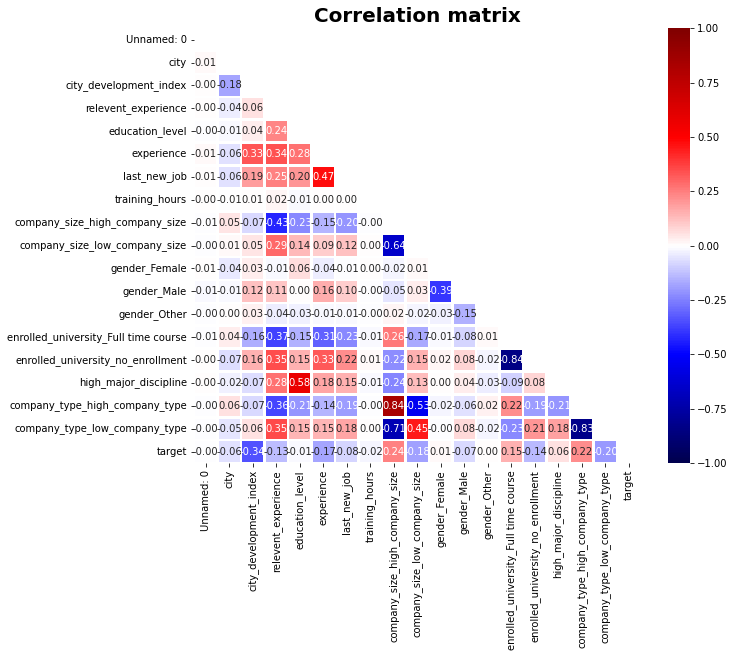

In [25]:
corr_matrix = base.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig = plt.figure(figsize=[10,8])
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1.5,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation matrix', weight='bold',fontsize=20)

In [6]:
y_base =base['target']

x_base =base[['city_development_index','relevent_experience','education_level', 'experience','last_new_job', 'training_hours', 'high_major_discipline', 'company_size_high_company_size', 'company_size_low_company_size','company_type_low_company_type','company_type_high_company_type', 'enrolled_university_Full time course','enrolled_university_no_enrollment','city']]

BALANCEO DE CLASES

In [7]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)
x_base, y_base = sm.fit_resample(x_base, y_base)

In [8]:
y_base.value_counts()

1    14381
0    14381
Name: target, dtype: int64

In [ ]:
x_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28762 entries, 0 to 28761
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city_development_index                28762 non-null  float64
 1   relevent_experience                   28762 non-null  int64  
 2   education_level                       28762 non-null  int64  
 3   experience                            28762 non-null  int64  
 4   last_new_job                          28762 non-null  int64  
 5   training_hours                        28762 non-null  int64  
 6   high_major_discipline                 28762 non-null  int64  
 7   company_size_high_company_size        28762 non-null  int64  
 8   company_size_low_company_size         28762 non-null  int64  
 9   company_type_low_company_type         28762 non-null  int64  
 10  company_type_high_company_type        28762 non-null  int64  
 11  enrolled_univer

PARTICIONO LA BASE (70-30)

In [9]:
from sklearn.model_selection import train_test_split   # testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x_base,y_base,test_size = 0.3,random_state = 0 )

In [10]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 20133
Length of Testing Data: 8629


REGRESION 

In [11]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=42)
classifier_logreg.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [12]:
y_pred = classifier_logreg.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

Accuracy Score: 0.7727430756750493
Precision: 0.7930700266537436
Recall: 0.7472602739726028
RMSE: 0.476715


In [15]:
import statsmodels.api as sm
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
x_train = sm.add_constant(x_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=x_train,)
modelo = modelo.fit()
print(modelo.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.488722
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                20133
Model:                          Logit   Df Residuals:                    20118
Method:                           MLE   Df Model:                           14
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.2949
Time:                        17:08:51   Log-Likelihood:                -9839.4
converged:                       True   LL-Null:                       -13955.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    9.5357      0.1

Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


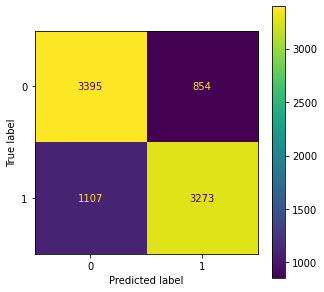

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_logreg, x_test,y_test)

Curva ROC

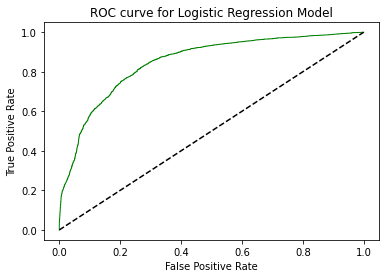

In [34]:
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [21]:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier_logreg.decision_function(x_test))

0.8485620038451163

Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.76657561 0.76086417 0.76930718 0.76999503 0.77247889]
Average cross-validation score: 0.7678441755112752


In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.74577954 0.78401192 0.76812314 0.75360159 0.75906607 0.78191754
 0.7620467  0.78142077 0.77496274 0.77247889]
Average cross-validation score: 0.7683408884948923


RANDOM FOREST

In [17]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=18, random_state= 42)

In [18]:
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=18, random_state=42)

In [19]:
random_forest_model.score(x_test, y_test)

0.8416966044732878

In [20]:
random_forest_model.score(x_train, y_train)

0.9658272487955099

In [42]:
fila5 = []

for i in range(14,29,2):
  print(i)
  rf = RandomForestClassifier(max_depth=i)
  rf.fit(x_train,y_train)
  r2_train = rf.score(x_train, y_train)
  r2_test = rf.score(x_test, y_test)
  fila5.append([i,r2_train,r2_test])

14
16
18
20
22
24
26
28


In [43]:
scores_prof = pd.DataFrame(fila5, columns=["max_depth","r2_train","r2_test"])
scores_prof

,max_depth,r2_train,r2_test
0,14,0.908757,0.833469
1,16,0.938708,0.837061
2,18,0.963741,0.839958
3,20,0.980678,0.841117
4,22,0.990712,0.840422
5,24,0.994785,0.837177
6,26,0.996722,0.836598
7,28,0.997268,0.837293


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


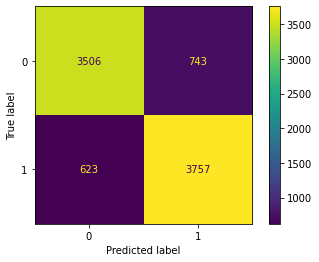

In [44]:
plot_confusion_matrix(random_forest_model, x_test,y_test)

In [25]:
y_pred = random_forest_model.predict(x_test)

print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, random_forest_model.predict_proba(x_test)[:,1]) 


Accuracy Score: 0.8416966044732878
Precision: 0.8348888888888889
Recall: 0.8577625570776256
RMSE: 0.397874


0.9093460078170421

Descision trees


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree =DecisionTreeClassifier(max_depth=10)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [29]:
dtree.score(x_test, y_test)

0.8128404218333527

In [48]:
dtree.score(x_train, y_train)

0.847067004420603

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


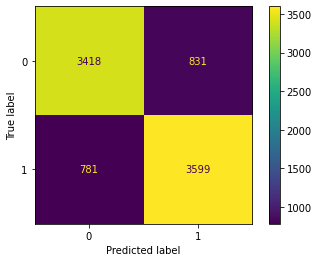

In [49]:
plot_confusion_matrix(dtree, x_test,y_test)

In [30]:
y_pred = dtree.predict(x_test)

print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

roc_auc_score(y_test, dtree.predict_proba(x_test)[:,1]) 

Accuracy Score: 0.8128404218333527
Precision: 0.8115844038764931
Recall: 0.8221461187214611
RMSE: 0.432619


0.8651397696583993

EXTRA TREES

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
Extra_T = ExtraTreesClassifier(max_depth = 20, n_estimators=150, random_state=42)
Extra_T.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=20, n_estimators=150, random_state=42)

In [32]:
Extra_T.score(x_test,y_test)

0.830571329238614

In [52]:
Extra_T.score(x_train,y_train)

0.9673173396910545

In [ ]:
fila = []

for i in range(14,25,2):
  print(i)
  et = ExtraTreesClassifier(max_depth=i)
  et.fit(x_train,y_train)
  r2_train = et.score(x_train, y_train)
  r2_test = et.score(x_test, y_test)
  fila.append([i,r2_train,r2_test])

14
16
18
20
22
24


In [ ]:
scores_depth = pd.DataFrame(fila, columns=["max_depth","r2_train","r2_test"])
scores_depth

,max_depth,r2_train,r2_test
0,14,0.885710,0.824893
1,16,0.916754,0.828369
2,18,0.946406,0.832426
3,20,0.967615,0.834512
4,22,0.981076,0.832541
5,24,0.987881,0.828254


In [ ]:
fila2 = []

for i in range(150,181,5):
  et2 = ExtraTreesClassifier(max_depth=20,n_estimators=i,random_state=42)
  et2.fit(x_train,y_train)
  r2_train = et2.score(x_train, y_train)
  r2_test = et2.score(x_test, y_test)
  fila2.append([i,r2_train,r2_test])

In [ ]:
scores_n_estimators = pd.DataFrame(fila2, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators

,n_estimators,r2_train,r2_test
0,120,0.967069,0.832078
1,125,0.967069,0.832773
2,130,0.967069,0.832310
3,135,0.967019,0.831614
4,140,0.967417,0.832310
5,145,0.967218,0.831846


In [ ]:
scores_n_estimators = pd.DataFrame(fila2, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators

,n_estimators,r2_train,r2_test
0,150,0.967069,0.832889
1,155,0.967119,0.832426
2,160,0.967119,0.832541
3,165,0.967268,0.832541
4,170,0.967019,0.832541
5,175,0.967069,0.831614
6,180,0.967119,0.832426


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


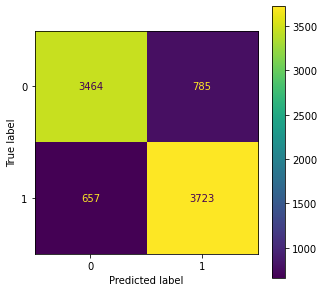

In [ ]:
plot_confusion_matrix(Extra_T, x_test,y_test)

In [33]:
y_pred = Extra_T.predict(x_test)

print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

roc_auc_score(y_test, Extra_T.predict_proba(x_test)[:,1]) 

Accuracy Score: 0.830571329238614
Precision: 0.8266905508284819
Recall: 0.8429223744292238
RMSE: 0.411617


0.9040332616538299

XG BOOST

In [77]:
import xgboost as xgb
XGboost = xgb.XGBClassifier(max_depth = 22, n_estimators = 160, colsample_bytree = 0.3)
XGboost.fit(x_train,y_train)

XGBClassifier(colsample_bytree=0.3, max_depth=22, n_estimators=160)

In [78]:
XGboost.score(x_test,y_test)

0.8543284273959902

0.8414648279058987 CON company high type
0.8407694982037316 SIN (le saco company type y size y baja - csi agrego gender baja - si saco educ_level baja)

In [80]:
XGboost.score(x_train,y_train)

0.9582774549247504

In [67]:
fila3 = []

for i in range(14,29,2):
  xb = xgb.XGBClassifier(max_depth=i)
  xb.fit(x_train,y_train)
  r2_train = xb.score(x_train, y_train)
  r2_test = xb.score(x_test, y_test)
  fila3.append([i,r2_train,r2_test])

In [68]:
scores_depth_xb = pd.DataFrame(fila3, columns=["max_depth","r2_train","r2_test"])
scores_depth_xb

,max_depth,r2_train,r2_test
0,14,0.969254,0.843435
1,16,0.978642,0.845173
2,18,0.985099,0.844246
3,20,0.989520,0.846100
4,22,0.991308,0.846332
5,24,0.993593,0.844941
6,26,0.994636,0.844130
7,28,0.994884,0.844014


In [75]:
fila4 = []

for i in range(135,191,5):
  xb = xgb.XGBClassifier(max_depth=22, n_estimators=i, colsample_bytree = 0.3)
  xb.fit(x_train,y_train)
  r2_train = xb.score(x_train, y_train)
  r2_test = xb.score(x_test, y_test)
  fila4.append([i,r2_train,r2_test])

In [71]:
scores_n_estimators2 = pd.DataFrame(fila4, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators2

,n_estimators,r2_train,r2_test
0,105,0.932201,0.852242
1,110,0.934982,0.851431
2,115,0.938708,0.851084
3,120,0.940893,0.850852
4,125,0.943923,0.852474
5,130,0.946804,0.852822


In [76]:
scores_n_estimators2 = pd.DataFrame(fila4, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators2

,n_estimators,r2_train,r2_test
0,135,0.948145,0.852822
1,140,0.949536,0.853633
2,145,0.949734,0.853054
3,150,0.953857,0.853285
4,155,0.955099,0.851895
5,160,0.958277,0.854328
6,165,0.958873,0.853170
7,170,0.958377,0.852822
8,175,0.958526,0.852474
9,180,0.959668,0.851895


In [81]:
from sklearn.metrics import mean_squared_error
import numpy as np

preds = XGboost.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.381669


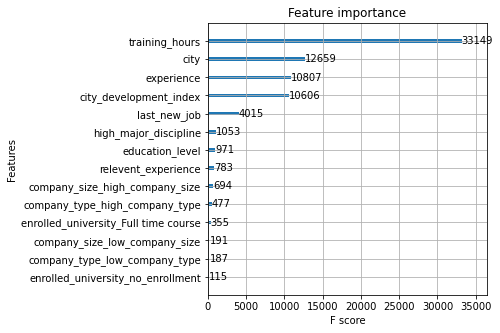

In [82]:
xgb.plot_importance(XGboost)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


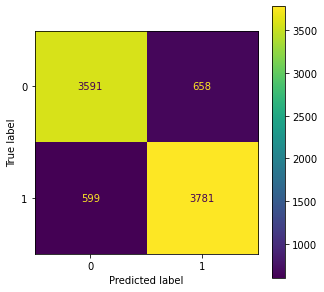

In [83]:
plot_confusion_matrix(XGboost, x_test,y_test)

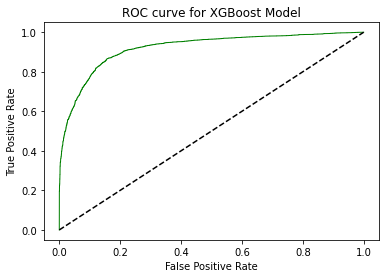

In [84]:
y_pred_xb_proba = XGboost.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xb_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for XGBoost Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [85]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, XGboost.predict_proba(x_test)[:,1]) 

0.9198093346702043

In [86]:
y_pred = XGboost.predict(x_test)

print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))



Accuracy Score: 0.8543284273959902
Precision: 0.8517684163099797
Recall: 0.8632420091324201


CV - XGBoost

In [64]:
from sklearn.model_selection import cross_val_score

for i in range(5,21,5):
  scores = cross_val_score(XGboost, x_train, y_train, cv = i, scoring='accuracy')

  print('Number of folds:', i)
  print('Cross-validation scores:{}'.format(scores))
  print('Average cross-validation score: {}'.format(scores.mean()))

Number of folds: 5
Cross-validation scores:[0.8331264  0.83585796 0.84728085 0.84500745 0.84848485]
Average cross-validation score: 0.8419515019766599
Number of folds: 10
Cross-validation scores:[0.82174777 0.84309831 0.84657398 0.82314953 0.84947839 0.85543964
 0.84600099 0.85196225 0.85593641 0.84550422]
Average cross-validation score: 0.8438891495251075
Number of folds: 15
Cross-validation scores:[0.8175726  0.83246463 0.85629188 0.84724292 0.84575261 0.82637854
 0.84724292 0.85171386 0.85767511 0.83979136 0.85320417 0.84947839
 0.85692996 0.8561848  0.84128167]
Average cross-validation score: 0.8452803611965263
Number of folds: 20
Cross-validation scores:[0.82820258 0.83316783 0.84409136 0.84409136 0.85004965 0.84607746
 0.82025819 0.83614697 0.8490566  0.84309831 0.85600794 0.85600794
 0.84011917 0.85387674 0.84592445 0.8528827  0.85487078 0.85387674
 0.85884692 0.83399602]
Average cross-validation score: 0.8450324863134993


In [70]:
  scores = cross_val_score(XGboost, x_train, y_train, cv = 25, scoring='accuracy')
  print('Number of folds:', 25)
  print('Cross-validation scores:{}'.format(scores))
  print('Average cross-validation score: {}'.format(scores.mean()))

Number of folds: 25
Cross-validation scores:[0.82382134 0.81513648 0.84863524 0.83622829 0.83995037 0.85235732
 0.84987593 0.83746898 0.81863354 0.82360248 0.85590062 0.83726708
 0.85590062 0.84968944 0.85590062 0.8310559  0.84223602 0.86832298
 0.83229814 0.85217391 0.85217391 0.85962733 0.86335404 0.85341615
 0.82608696]
Average cross-validation score: 0.8432445478784889


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.916765 to fit


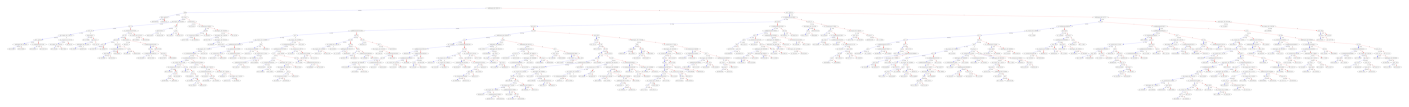

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(XGboost,num_trees=1)
plt.rcParams['figure.figsize'] = [25, 5]
plt.show()

SVM - linear

In [48]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)

SVC(kernel='linear')

In [49]:
svm_clf.score(x_test,y_test)

0.7758720593348013

In [73]:
svm_clf.score(x_train,y_train)

0.7716187354095266

In [51]:
from sklearn import metrics

Ypred = svm_clf.predict(x_test)

print("Precision:",metrics.precision_score(y_test, Ypred))
print("Recall:",metrics.recall_score(y_test, Ypred))

rmse = np.sqrt(mean_squared_error(y_test, Ypred))
print("RMSE: %f" % (rmse))

roc_auc_score(y_test, svm_clf.decision_function(x_test)) 

Precision: 0.7932853717026379
Recall: 0.7552511415525114
RMSE: 0.473422


0.8457790229449638

**Precision** nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?
**Recall** nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?
**F1** combina Precision y Recall en una sola medida

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


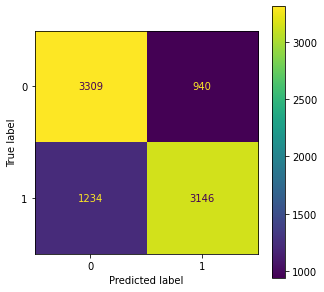

In [ ]:
plot_confusion_matrix(svm_clf, x_test,y_test)

SVM - polynomial

In [76]:
from sklearn import svm
svm_clf2 = svm.SVC(kernel='poly')
svm_clf2.fit(x_train, y_train)

SVC(kernel='poly')

In [77]:
Ypred2 = svm_clf2.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, Ypred2))
print("Precision:",metrics.precision_score(y_test, Ypred2))
print("Recall:",metrics.recall_score(y_test, Ypred2))

rmse = np.sqrt(mean_squared_error(y_test, Ypred2))
print("RMSE: %f" % (rmse))

roc_auc_score(y_test, svm_clf2.decision_function(x_test))

Accuracy: 0.6150191215668096
Precision: 0.5806894447834046
Recall: 0.8691780821917808


SVM - radial

In [79]:
from sklearn import svm
svm_clf3 = svm.SVC(kernel='rbf')
svm_clf3.fit(x_train, y_train)

SVC()

In [80]:
Ypred3 = svm_clf3.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, Ypred3))
print("Precision:",metrics.precision_score(y_test, Ypred3))
print("Recall:",metrics.recall_score(y_test, Ypred3))

rmse = np.sqrt(mean_squared_error(y_test, Ypred3))
print("RMSE: %f" % (rmse))

roc_auc_score(y_test, svm_clf3.decision_function(x_test))

Accuracy: 0.6742380345347085
Precision: 0.677609237038714
Recall: 0.6833333333333333


RED NEURONAL

In [52]:
from sklearn.neural_network import MLPClassifier
clf_red = MLPClassifier(hidden_layer_sizes=(7,), random_state=42)
clf_red.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(7,), random_state=42)

In [53]:
clf_red.score(x_test,y_test)

0.8043805771236529

In [54]:
clf_red.score(x_train,y_train)

0.8013212139273829

In [ ]:
fila7 = []

for i in range(5,22,2):
  red = MLPClassifier(hidden_layer_sizes=(i,), random_state=42)
  red.fit(x_train,y_train)
  r2_train = red.score(x_train, y_train)
  r2_test = red.score(x_test, y_test)
  fila7.append([i,r2_train,r2_test])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
scores_layers = pd.DataFrame(fila7, columns=["capas ocultas","r2_train","r2_test"])
scores_layers

,capas ocultas,r2_train,r2_test
0,5,0.745492,0.741453
1,7,0.784086,0.789431
2,9,0.765410,0.770889
3,11,0.780410,0.782709
4,13,0.769731,0.766601
5,15,0.769533,0.774018
6,17,0.776139,0.771005
7,19,0.785874,0.783405
8,21,0.775493,0.774366


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


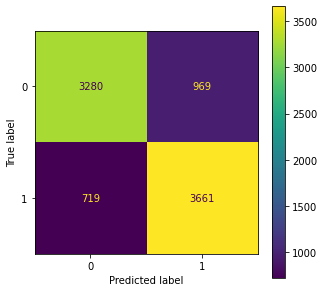

In [57]:
plot_confusion_matrix(clf_red, x_test,y_test)

In [55]:
red_pred = clf_red.predict(x_test)

print("Precision:",metrics.precision_score(y_test, red_pred))
print("Recall:",metrics.recall_score(y_test, red_pred))

rmse = np.sqrt(mean_squared_error(y_test, red_pred))
print("RMSE: %f" % (rmse))

roc_auc_score(y_test, clf_red.predict_proba(x_test)[:,1]) 

Precision: 0.7907127429805616
Recall: 0.8358447488584475
RMSE: 0.442289


0.8693581944072792

NAIVE BAYES

In [56]:
from sklearn.naive_bayes import GaussianNB
modeloNB = GaussianNB()
modeloNB.fit(x_train, y_train)

GaussianNB()

In [58]:
from sklearn import metrics
y_ppred = modeloNB.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_ppred))

Accuracy: 0.7167690346505968


In [59]:
modeloNB.score(x_test, y_test)

0.7167690346505968

In [60]:
print("Precision:",metrics.precision_score(y_test, y_ppred))
print("Recall:",metrics.recall_score(y_test, y_ppred))

rmse = np.sqrt(mean_squared_error(y_test, y_ppred))
print("RMSE: %f" % (rmse))

roc_auc_score(y_test, modeloNB.predict_proba(x_test)[:,1]) 

Precision: 0.72480260102183
Recall: 0.7125570776255707
RMSE: 0.532194


0.7843655934084948

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


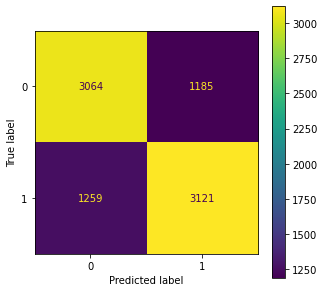

In [65]:
plot_confusion_matrix(modeloNB, x_test,y_test)

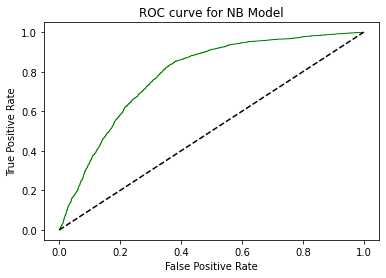

In [62]:
y_pred_xb_proba = modeloNB.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xb_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for NB Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()